In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important;} *{font-family:'Consolas'; font-size:14;} </style>"))

# 분류분석

- 데이터의 속성을 활용하여 데이터에 대한 분류 기준을 수립하는 과정
- 지도학습 <-> 비지도학습(군집분석, 연관분석)
- ex: MNIST 필기체 숫자 데이터 분류, iris 데이터의 종 분류 등

## 분류용 예제 데이터셋
### iris(붓꽃) 데이터셋

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
import pandas as pd
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris['target_names'][iris['target']], columns=['species'])
iris_df = pd.concat([X, y], axis=1)

In [9]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
iris['target_names'][iris['target']]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

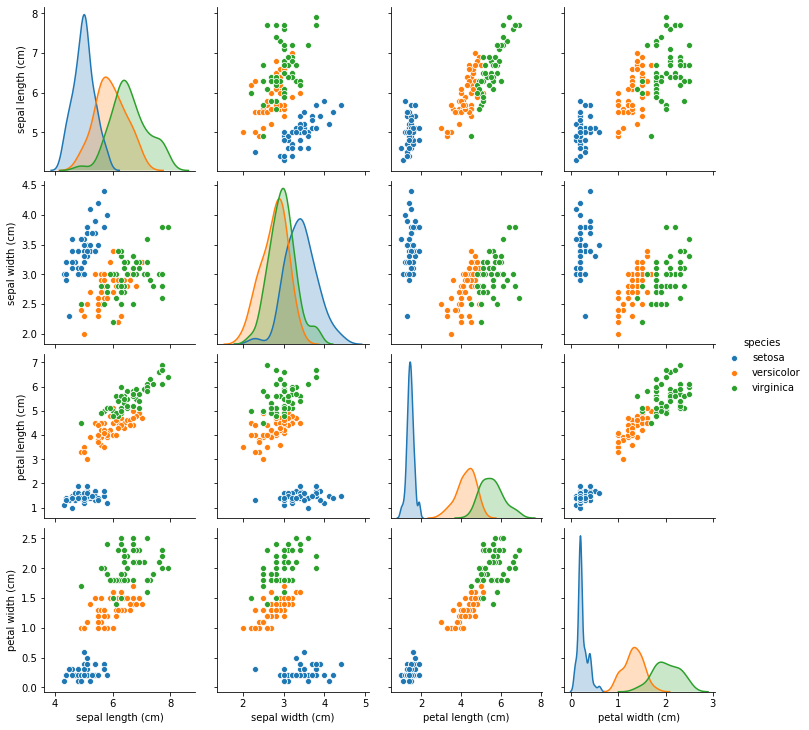

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.pairplot(iris_df, hue="species")
plt.show()

In [16]:
# statsmodels 패키지 활용
from statsmodels.datasets import get_rdataset
iris = get_rdataset("iris", package="datasets")
iris_df = iris.data
iris_df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### wine(와인) 데이터셋

In [18]:
from sklearn.datasets import load_wine
import pandas as pd
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [20]:
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
y_ = pd.Series(wine.target, dtype="category")
y = y_.cat.rename_categories(wine.target_names)
wine_df['class'] = y
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


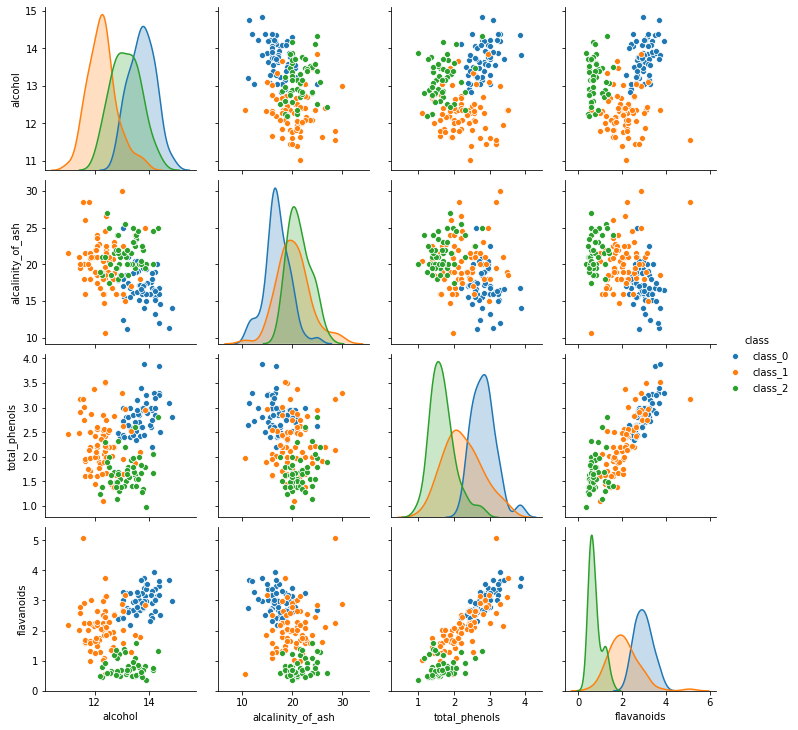

In [21]:
sns.pairplot(wine_df[['alcohol', 'alcalinity_of_ash', 'total_phenols', 'flavanoids', 'class']], hue='class')
plt.show()

### breast cancer(유방암) 진단 데이터셋

유방암 진단 사진으로부터 측정한 종양(tumar)의 특징 값을 사용하여 종양이 양성(benign)인지 악성(malignant)인지 확인

In [22]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [23]:
breast_cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_ = pd.Series(cancer.target, dtype="category")
y = y_.cat.rename_categories(cancer.target_names)
breast_cancer_df['class'] = y
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


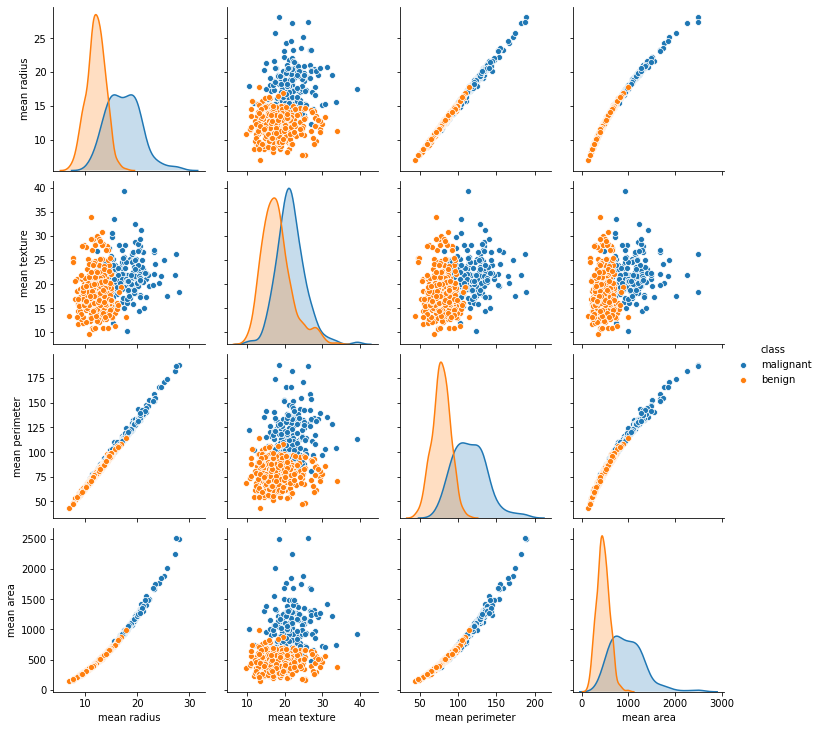

In [24]:
sns.pairplot(breast_cancer_df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'class']], hue='class')
plt.show()

### digits(숫자 필기체 이미지) 데이터셋

In [25]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

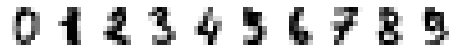

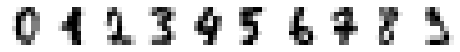

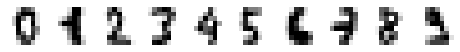

In [26]:
N = 30
nrows = (N//10)

for row in range(nrows):
    plt.figure(figsize=(8,8))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(digits.images[i+row*10], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.axis('off')
    plt.show()

## 분류용 가상 데이터셋

In [31]:
def draw_scatter(X, y, title):
    plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=2)
    plt.show()

In [27]:
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_samples=100, n_features=20, n_informative=2,
                           n_redundant=2, n_repeated=0, n_classes=2,
                           n_clusters_per_class=2, weights=None, random_state=None)

n_samples: 표본 데이터 수 <br>
n_features: 독립변수의 수 <br>
n_informative: 돌립변수 중 종속변수와 상관관계가 있는 성분의 수 <br>
n_redundant: 돌립변수 중 다른 독립변수와 선형 조합으로 나타나는 성분의 수 <br>
n_repeated: 독립변수 중 단순 중복된 성분의 수 <br>
n_classes: 종속변수의 클래스 수 <br>
n_clusters_per_class: 클래스 당 클러스터의 수 <br>
weights: 각 클래스에 할당된 표본 비율 실수 리스트 <br>
random_state: 난수 발생 시드 <br><br>
X: [n_samples, n_features] 크기의 배열, 독립변수 <br>
y: [n_samples] 크기의 배열, 종속변수

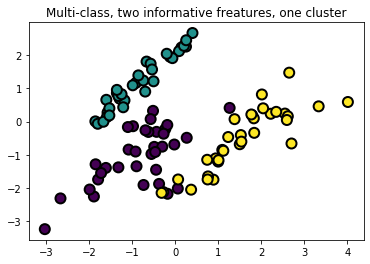

In [32]:
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=3)

draw_scatter(X, y, "Multi-class, two informative freatures, one cluster")

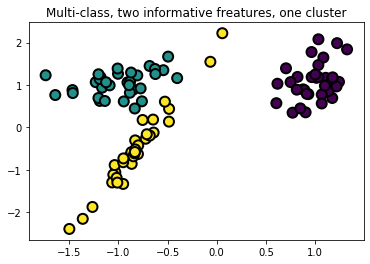

In [33]:
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=3,
                           random_state=1) # 항상 같은 데이터셋이 만들어지도록

draw_scatter(X, y, "Multi-class, two informative freatures, one cluster")

In [30]:
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3,
                  cluster_std=1.0, center_box=(-10.0, 10.0),
                  shuffle=True, random_state=None)

n_samples: 표본 데이터 수 <br>
n_features: 독립변수의 수 <br>
centers: 생성할 클러스터의 수 혹은 중심 <br>
cluster_std: 클러스터의 표준편차 <br>
center_box: 생성할 클러스터의 바운딩 박스 <br><br>

X: [n_samples, n_features] 크기의 배열, 독립변수 <br>
y: [n_samples] 크기의 배열, 종속변수

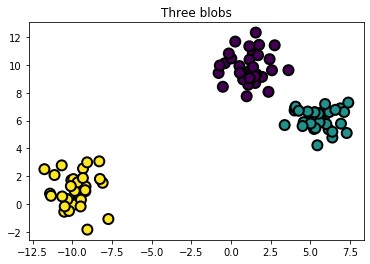

In [35]:
X, y = make_blobs(n_features=2, centers=3)

draw_scatter(X, y, "Three blobs")

In [36]:
from sklearn.datasets import make_gaussian_quantiles

In [ ]:
X, y = make_gaussian_quantiles(mean=None, cov=1.0, n_samples=100,
                               n_features=2, n_classes=3, shuffle=True, random_state=None)

mean: 기댓값 벡터 <br>
cov: 공분산 행렬 <br>
n_samples: 표본 데이터 수 <br>
n_features: 독립변수의 수  <br><br>

X: [n_samples, n_features] 크기의 배열, 독립변수 <br>
y: [n_samples] 크기의 배열, 종속변수

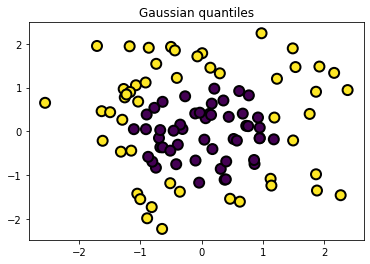

In [37]:
X, y = make_gaussian_quantiles(n_features=2, n_classes=2, random_state=0)

draw_scatter(X, y, "Gaussian quantiles")

## 분류분석 모형

분류분석 모형의 종류
- 판별함수(discriminant function) 모형
        주어진 데이터 클래스에 따라 서로 다른 영역으로 나누는 경계면(decision boundary)를 찾은 후, 이 경계면으로부터 주어진 데이터가 어느 위치에 있는지 계산하는 판별함수를 이용하는 모형
        퍼셉트론(sklearn.linear_model.Perceptron), 서포트 벡터 머신(sklearn.svm.SVC), 신경망(sklearn.neural_network.MLPClassifier)
- 확률적(probability) 모형
        주어진 데이터에 대해(conditionally) 각 클래스가 정답일 조건부확률(conditional probability)을 계산하는 모형
    - 확률적 판별(discriminative): 직접 조건부확률 함수를 추정
            로지스틱 회귀(sklearn.linear_model.LogisticRegression), 의사결정나무(sklearn.tree.DecisionTreeClassifier)
    - 확률적 생성(generative) 모형: 베이즈 정리를 사용
            Linear/Quandratic Discriminant Analysis(sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis), 나이브 베이지안(sklearn.naive_bayes.MultinomialNB)
    

# 인공신경망

In [38]:
import pandas as pd

In [39]:
train = pd.read_csv("data_cust_2-3_train.csv")

In [40]:
train.head()

,CUST_ID,SIU_CUST_YN,SEX,AGE,FP_CAREER,CTPR,OCCP_GRP_1,WEDD_YN,MATE_OCCP_GRP_1,CUST_INCM,...,X2_5,X2_6,X3_1,X3_2,X3_3,X3_4,X3_5,X3_6,X3_7,X3_9
0,2,0,1,5,0,1,3,1,1,6509,...,0,0,0,0,3,0,0,0,0,0
1,3,0,1,6,0,1,5,0,0,4180,...,0,0,0,0,0,0,0,0,0,0
2,5,0,2,5,1,5,2,1,3,3894,...,0,0,0,0,0,0,0,0,0,0
3,6,0,1,6,0,12,3,1,1,3990,...,0,0,0,1,0,0,0,0,0,0
4,7,1,2,6,0,1,5,1,0,3611,...,0,0,0,4,0,0,0,0,0,0


In [41]:
test = pd.read_csv("data_cust_2-3_test.csv")

In [42]:
test.head()

,CUST_ID,SIU_CUST_YN,SEX,AGE,FP_CAREER,CTPR,OCCP_GRP_1,WEDD_YN,MATE_OCCP_GRP_1,CUST_INCM,...,X2_5,X2_6,X3_1,X3_2,X3_3,X3_4,X3_5,X3_6,X3_7,X3_9
0,1,0,2,4,0,11,3,1,3,4879,...,0,0,0,0,4,0,0,0,0,0
1,4,0,2,6,1,9,2,0,0,3806,...,0,0,0,0,0,0,0,0,0,0
2,9,0,1,5,0,1,4,1,4,4975,...,0,0,0,0,2,0,0,0,0,0
3,10,0,2,8,0,0,0,0,0,862,...,0,0,0,0,0,0,0,0,0,0
4,12,0,1,5,0,1,4,1,4,8780,...,0,0,0,0,0,0,0,0,0,0


In [43]:
set(test.SIU_CUST_YN)

{0, 1}

In [54]:
train_X = train.iloc[:, 2:]
train_y = train.iloc[:, 1]

In [55]:
train_X.shape, train_y.shape

((14424, 32), (14424,))

In [56]:
test_X = test.iloc[:, 2:]
test_y = test.iloc[:, 1]

In [60]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(train_X, train_y)
model.score(test_X, test_y)

0.8863011483098819

In [61]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50,30,20))
model.fit(train_X, train_y)
model.score(test_X, test_y)

0.9210739123402879

In [112]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
model = MLPClassifier(hidden_layer_sizes=(50,30,20,50),
                      activation='relu', solver='adam',
                      alpha=0.0001, 
                      batch_size='auto',          # solver='lbfgs'일 경우 사용하지 않음
                      # learning_rate='constant', # solver='sgd'일 때만 사용
                      learning_rate_init=0.001,   # solver='sgd' or 'adam' 일때만 사용
                      # power_t=0.5,              # solver='sgd'일 때만 사용 
                      max_iter=200, shuffle=True, tol=0.0001,
                      warm_start=False, 
                      # momentum=0.9,             # solver='sgd'일 때만 사용 
                      # nesterovs_momentum=True,  # solver='sgd'이고 momentum>0일 경우 사용
                      early_stopping=False,       # solver='sgd' or 'adam'일 떄만 사용
                      validation_fraction=0.1,    # early_stopping=True 일 때만 사용
                      beta_1=0.9, beta_2=0.999, epsilon=0.00000001, # solver='adam'일 때만 사용
                      n_iter_no_change=10,        # solver='sgd' or 'adam'일 때만 사용
                      # max_fun=15000,            # solver='lbfgs'일 때만 사용
                      verbose=False, random_state=1)

model.fit(train_X, train_y)
pred = model.predict(test_X)
f1_score(pred, test_y)

0.4418052256532067

In [113]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
mlp_model = MLPClassifier(hidden_layer_sizes=(50,30,20,10),
                      random_state=1)

mlp_model.fit(train_X, train_y)
# pred = model.predict(test_X)
# f1_score(pred, test_y)

0.47690857681432614

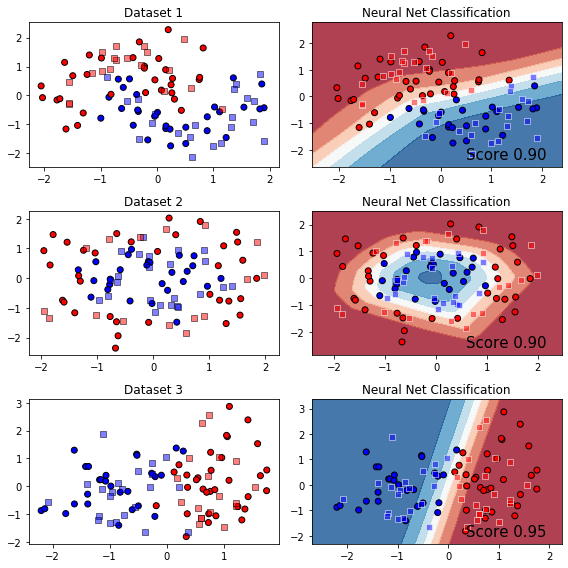

In [118]:
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

# 데이터셋 생성
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
datasets = [make_moons(noise=0.3, random_state=0), #arc
            make_circles(noise=0.2, factor=0.5, random_state=1), #circle
            (X, y) #linear
           ]
figure = plt.figure(figsize=(8,8))

# 데이터셋들 마다 반복
for ds_cnt, ds in enumerate(datasets):
    # 데이터셋을 학습 데이터와 검증 데이터로 나눔
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # 데이터셋을 그리기 위한 설정
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    ax = plt.subplot(len(datasets), 2, 2*ds_cnt+1)
    ax.set_title('Dataset %d' % (ds_cnt+1))
    
    # 학습 데이터의 산점도
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolor='k')
    # 검증 데이터의 산점도
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
              edgecolor='k', marker='s', alpha=0.5)
    
    ax = plt.subplot(len(datasets), 2, 2*ds_cnt+2)
    
    # 분류 모형 생성 및 예측
    model = MLPClassifier(alpha=1, max_iter=1000)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    score = model.score(X_test, y_test)
    
    # 결정 경계(decision boundary)를 그리기 위함
    if hasattr(model, "decision_function"):
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        
    # 채워진 등고선(contourf)을 이용해 결졍 경계를 시각화
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    
    # 학습 데이터 분류 예측 결과를 산점도로 시각화
    ax.scatter(X_train[:, 0], X_train[:, 1], c=train_pred, cmap=cm_bright,
               edgecolor='k')
    # 검증 데이터 분류 예측 결과를 산점도로 시각화
    ax.scatter(X_test[:, 0], X_test[:, 1], c=test_pred, cmap=cm_bright,
               edgecolor='w', marker='s', alpha=0.5)
    
    ax.set_title("Neural Net Classification")
    ax.text(xx.max() - .3, yy.min() + .3,
            ('Score %.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    
plt.tight_layout()
plt.show()